#Métodos Computacionales - Universidad de los Andes
##Experimento: Distribución de velocidades de las partículas de un gas

###Introducción
Este experimento tiene como objetivo demostrar que, estando en equilibrio, las velocidades de las partículas de un gas de discos suaves, que interactúan de acuerdo al potencial de Lennard Jones truncado, tienden a comportarse de acuerdo a la distribución estadística de Rayleigh. Para esto hemos descargado un código que simula el comportamiento de un gas como el descrito anteriormente del siguiente  [link](http://www.ph.biu.ac.il/~rapaport/mdbook/) Referenciado en la bibliografía también. En seguida, se modificaron y obvtuvieron los datos del gas de dicha página y se analizaron haciendo uso de funciones básicas de Python y de la librería MatPlotLib. 

###Marco Teórico
La **Distribución de Rayleigh**, es una función de distribución continua comúnmente usada en estadística y probabilidad que modela la manera en la que algunos eventos físicos se comportan, un ejemplo de esto es la velocidad del viento. Esta función tiene como parámetro de escala $\sigma$, el cual que tan distanciados están los datos unos de otros. 

La función que representa la **Distribución de Rayleigh** está dada por:
*$$f(x,\sigma )= \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}}$$*

De manera gráfica, la *Distribución de Rayleigh* se ve así:
![alt text](http://www.monografias.com/trabajos55/tren-de-fuerza-con-multiplicador/Image9945.gif)

Imagen 1: Ejemplo tomado de Monografias.com. Distibución de velocidades del viento.

Específicamente, en nuestro caso se estudiarán las partículas de un gas bajo el efecto del potencial de **Lennard-Jones**. En el archivo que se descargó de la página previamente mencionada se modificaron los parámetros de stepAvg, stepLimit y initUcell a 2, 500 y 40:40, respectivamente. 

###Análisis de Datos
Como fue anticipado anteriormente, los datos utilizados fueron obtenidos descargando el software de simulación mencionado en la *Introducción*. Una vez modificados los parámetros de interés, se ejecutaron los archivos de simulación y automáticamente se creó un archivo denominado **Rayleigh.csv** con 4 columnas; la primera y segunda columna representaban la posición en x y y, respectivamente. Mientras que las últimas dos columnas representaban las componentes de sus velocidades en el mismo orden. Es importante aclarar que los datos que provee el software están dados para 1600 partículas del gas, lo que quiere decir que cada 1600 datos en las columnas es un instante nuevo de medición.

A partir de esto, recurrimos a la librería de Matplotlib para hallar relaciones y representaciones gráficas de los datos  obtenidos.

In [4]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Método para importar archivos a Python
data=np.genfromtxt("Rayleigh.csv", delimiter=",")

In [7]:
#Separación de cada columna en un array distinto.
x=data[:,0]
y=data[:,1]
velx=data[:,2]
vely=data[:,3]

Cómo el que las partículas estén en equilibrio es un requisito para que nuestro experimento funcione, se deben tomar los últimos 1600 datos de cada columna, ya que este fue el último momento de medición, se asume que para este momento ya se había alcanzado el menor potencial posible. Una vez hecho esto, tomamos las dos componentes de la velocidad en el último instante y calculamos la norma. Este último arreglo de datos fue utilizado para realizar un histograma.

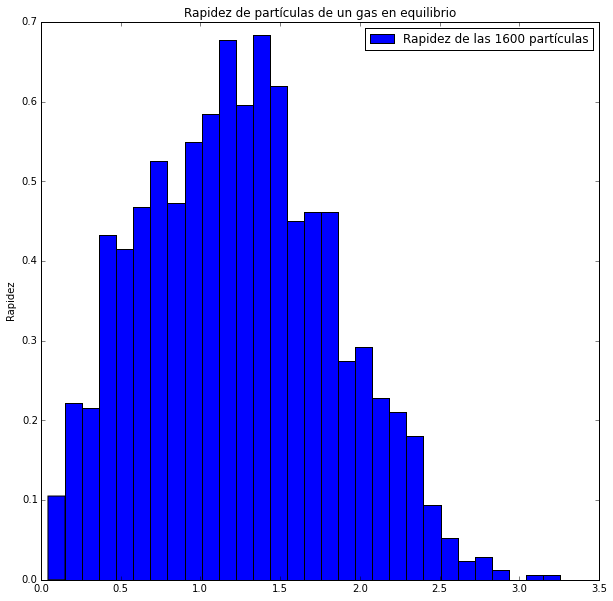

In [8]:
Norma= (velx[-1601:-1]**2+vely[-1601:-1]**2)**(0.5)

figure(figsize=(10,10))
#Se construye un histograma normalizado.
hist(Norma, bins = 30, normed = True, label = "Rapidez de las 1600 partículas")
#Modifico las propiedades del histograma
title("Rapidez de partículas de un gas en equilibrio")
ylabel("Rapidez")
legend()
show()

Ahora bien, con el fin de comparar que tan similar es el comportamiento visto en la gráfica anterior al de la **Distribución Rayleigh**, realizaré un ajuste curva con la función que fue presentada en el marco teórico.

[ 0.99066339]


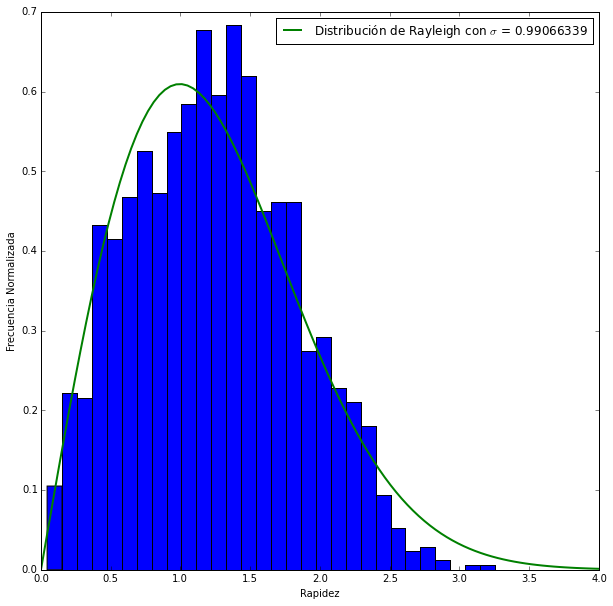

In [46]:
#Importo librerias de interés.
from matplotlib import animation
from scipy.optimize import curve_fit

graph1 = hist(Norma, bins = 30, normed = True)


#Se declaran dos arreglos que contengan los datos del eje X y el eje Y.
X = delete(graph1[1], -1)
Y = graph1[0]


#Creación de un método que retorne la función Rayleigh.

def RayleighAdjust(s,a):
    return (s/a)*(exp((-s**2)/(2*a)))
fitpars,covmat= curve_fit(RayleighAdjust,X,Y)

#------ Ahora plotearé una gráfica encima de la otra pata poder compararlas.
figure=figsize(20,10)

t=linspace(0,4,100)
plot(t, RayleighAdjust(t, *fitpars), color = "green", linewidth = 2, label = "Distribución de Rayleigh con $\sigma$ = 0.99066339")
ylabel("Frecuencia Normalizada", alpha=4.0)
xlabel("Rapidez")
legend()

print (fitpars)

El tener un parámetro de escala $\sigma$ mayor a 0.99 es un claro indicador que el ajusta es muy cercano al modelo teórico cuyo parámetro es 1. Esto implica que el comportamiento de las partículas efectivamente se acomoda a la Distribución Rayleigh. 

###Animación: Tendencia a la Distribución de Rayleigh

En aras de verificar la manera en la que las rapideces de las partículas empiezan en un estado desorganizado, por decirlo de algún modo, y gradualmente empiezan a distrbuirse según la función de Rayleigh a continuación se presenta la manera de animar como evolciona las rapideces de las partículas con el paso del tiempo. 

Para hacer esto, primero se debe obtener los histogramas de 10 instantes de medición. Los escogidos en este caso fueron 11 momentos con intervalos de 25 instantes posibles. Esto quiere decir que la animación consta de los instantes 0, 25, 50 y así consecutivamente hasta el instante 250.

Para realizar esto, se implementa el siguiente código en **iPyhton**:

```
figure=figsize(10,10)
Norma= (velx[250*1600:(250+1)*1600]**2+vely[250*1600:(250+1)*1600]**2)**(0.5)
hist(Norma, bins = 30, normed=True)
title("Rapidez de las 1600 partículas en el instante 250")
ylabel("Frecuencia Normalizada", alpha=4.0)
xlabel("Rapidez")
savefig("Histograma 250")
```


El anterior código muestra la creación del histograma correspondiente al instante 0, sin embargo,
para realizar los otros 10 histogramas sólo fue necesario reemplazar el 0 por el instante de interés.

Una vez se tienen las imágenes de los 10 histogramas con los cuales se hará la animación, se descargan dos softwares que permiten transformar una serie de imágenes en un gif. El nombre de estos programas es **Image Magick** y **Gifsicle**, el primer programa cambia el formato de los archivos de .png a .gif y el segundo los une de manera secuencial teniendo como resultado una animación. 

El código que debe escribirse en la terminal para ejecutar lo enunciado anteriormente es el siguiente: 

```
convert Histograma1.png Histograma1.gif
#Repetir estos para las 11 imágenes.

gifsicle -d 30 --loop=3 (escribir acá todos los archivos .gif separados de un espacio) > animación1.gif
#Esto lo que hace es crear un gif que itera 3 veces con un espaciado de 0.3 segundos entre frames.

gifsicle -l animación1.gif > animaciónFinal.gif
#Este último código hace que el código itere de manera infinita.

``` 

A continuación se presenta el resultado del proceso anterior: 

![alt text](https://cloud.githubusercontent.com/assets/12629060/8173811/537db6be-13d3-11e5-90c3-319ec4127e54.gif)
**Imagen1 Animación de los histogramas usados durante el experimento**

###Conclusiones

A partir del experimento es posible concluir que: 

- Las rapideces de las partículas de un gas de discos suaves, que interactúan de acuerdo al potencial de Lennard Jones truncado, efectivamente tiende a organizarse de acuerdo a la distribución estadística de Rayleigh. El error experimental fue menor al 1% por lo cual se considera que la similitud entre ambos comportamientos es notablemente alta. 

- Se observó que este proceso es espontáneo y gradual, y que a mayor tiempo de se obtiene una mejor correlación con la función teórica de Rayleigh. Esto quiere decir que con el paso del tiempo, el gas tiende a estabilizarse. A menor potencial, el gas estará en un estado de mayor equilibrio lo cuál es un requisito para que la aplicación de la Distribución de Rayleigh sea correcta. 

- Por último, es importante recalcar que el desarrollo de este experimento permitió conocer en mayor medida las funciones básicas de **Python** y **Matplotlib**, y que el recurrir a métodos computacionales para analizar problemas físicos es una herramienta considerablemente eficiente y útil.  


###Bibliografía y Software utilizado

- Potencial de Lennard-Jones. [Wikipedia. La enciclopedia libre](https://es.wikipedia.org/wiki/Potencial_de_Lennard-Jones)
- Distribución de Rayleigh. [Wikipedia. La enciclopedia libre](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Rayleigh)
- Monografías.com 
- The Art of Molecular Dynamics Simulation, 2 ed. D.Rapaport. Cambridge University Press, 2004.
- [Gifsicle](http://www.lcdf.org/gifsicle/)
- [ImageMagick](http://www.imagemagick.org/script/index.php)

